In [148]:
import pandas
import seaborn
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipotle_data=pandas.read_csv(url, sep='\t')
chipotle_data.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [149]:
chipotle_data.info()
chipotle_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [150]:
chipotle_data.columns


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [151]:
items_quantity = chipotle_data.groupby('item_name')['quantity'].sum()
most_quantity = items_quantity.max()
print(most_quantity)
most_ordered_item = items_quantity.idxmax()
print(most_ordered_item)

761
Chicken Bowl


In [152]:
chipotle_data["item_price"]=chipotle_data["item_price"].str.replace("$","").astype(float)
total_revenue =(chipotle_data["item_price"]*chipotle_data["quantity"]).sum()
print(total_revenue)

39237.02


In [153]:
chipotle_data["order_id"].nunique()

1834

In [154]:
items_above10=len(chipotle_data[chipotle_data["item_price"]>10])
print(items_above10)


1130


item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64


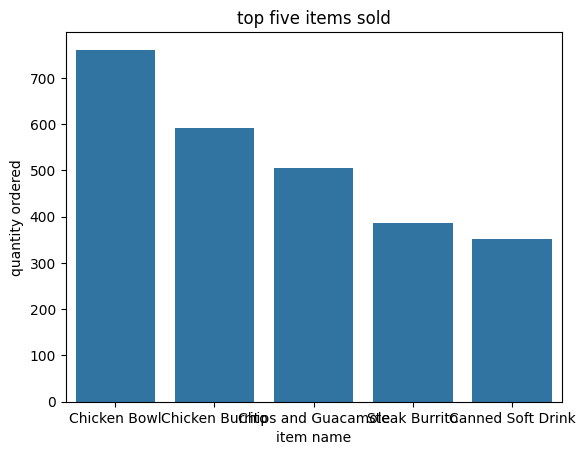

In [155]:
top5=items_quantity.nlargest(5)
print(top5)

seaborn.barplot(data=top5)
plt.xlabel("item name")
plt.ylabel("quantity ordered")
plt.title("top five items sold")
plt.show()

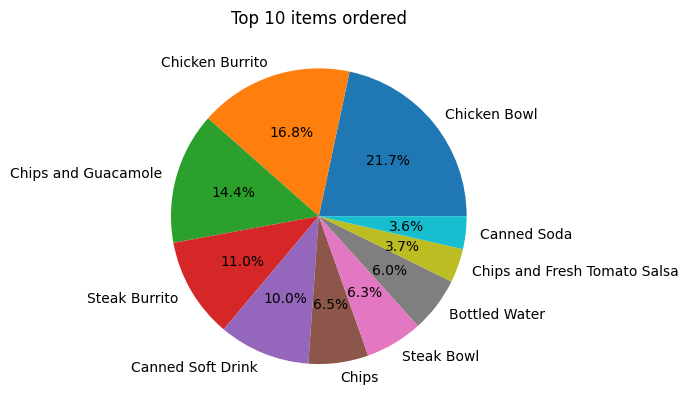

In [156]:
top_10_items = items_quantity.nlargest(10)
plt.pie(top_10_items, labels=top_10_items.index, autopct="%1.1f%%")
plt.title("Top 10 items ordered")
plt.show()

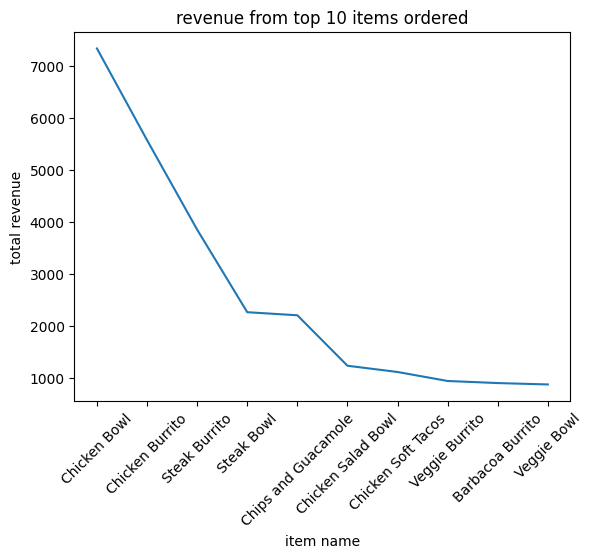

In [157]:
items_price=chipotle_data.groupby('item_name')['item_price'].sum()
top_10_price=items_price.nlargest(10)

seaborn.lineplot(data=top_10_price)
plt.xlabel("item name")
plt.ylabel("total revenue")
plt.title("revenue from top 10 items ordered")
plt.xticks(rotation=45)
plt.show()

